<a href="https://colab.research.google.com/github/T-Cent/culling/blob/main/Culling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#!wget https://mandrillapp.com/track/click/31045195/dxomark.com?p=eyJzIjoiUDU4TUUyMFdzM2ZETzhXWUwzVXJNUXlMalpVIiwidiI6MSwicCI6IntcInVcIjozMTA0NTE5NSxcInZcIjoxLFwidXJsXCI6XCJodHRwczpcXFwvXFxcL2R4b21hcmsuY29tXFxcL2Rha2RhdGFcXFwvZGF0YXNldFxcXC9sTjRsU1R2eS0tLXFBVHB1cG1nSi0tLXhKZWpMSURCV04tLS1ENUczZ01SZ2I3Z2Y0PVwiLFwiaWRcIjpcIjIzZmYwMTExODlmYTRlNmQ4ZDI3NTY0MTIyZWNlODA5XCIsXCJ1cmxfaWRzXCI6W1wiZWRiMTdkMWY2ZjgxMTQxM2UxNDRlNGMwMmVmM2NhMzQyZDQ5OWVlOVwiXX0ifQ

In [14]:
#!unzip /content/dxomark.com?p=eyJzIjoiUDU4TUUyMFdzM2ZETzhXWUwzVXJNUXlMalpVIiwidiI6MSwicCI6IntcInVcIjozMTA0NTE5NSxcInZcIjoxLFwidXJsXCI6XCJodHRwczpcXFwvXFxcL2R4b21hcmsuY29tXFxcL2Rha2RhdGFcXFwvZGF0YXNldFxcXC9sTjRsU1R2eS0tLXFBVHB1cG1nSi0tLXhKZWpMSURCV04tLS -d /content/drive/MyDrive/Culling

In [2]:
import os

In [3]:
details_filenames = ["/content/drive/MyDrive/Culling/Dataset/Details/" + i for i in os.listdir("/content/drive/MyDrive/Culling/Dataset/Details")]
exposure_filenames = ["/content/drive/MyDrive/Culling/Dataset/Exposure/" + i for i in os.listdir("/content/drive/MyDrive/Culling/Dataset/Exposure")]
overall_filenames = ["/content/drive/MyDrive/Culling/Dataset/Overall/" + i for i in os.listdir("/content/drive/MyDrive/Culling/Dataset/Overall")]

In [4]:
import PIL
from IPython.display import Image

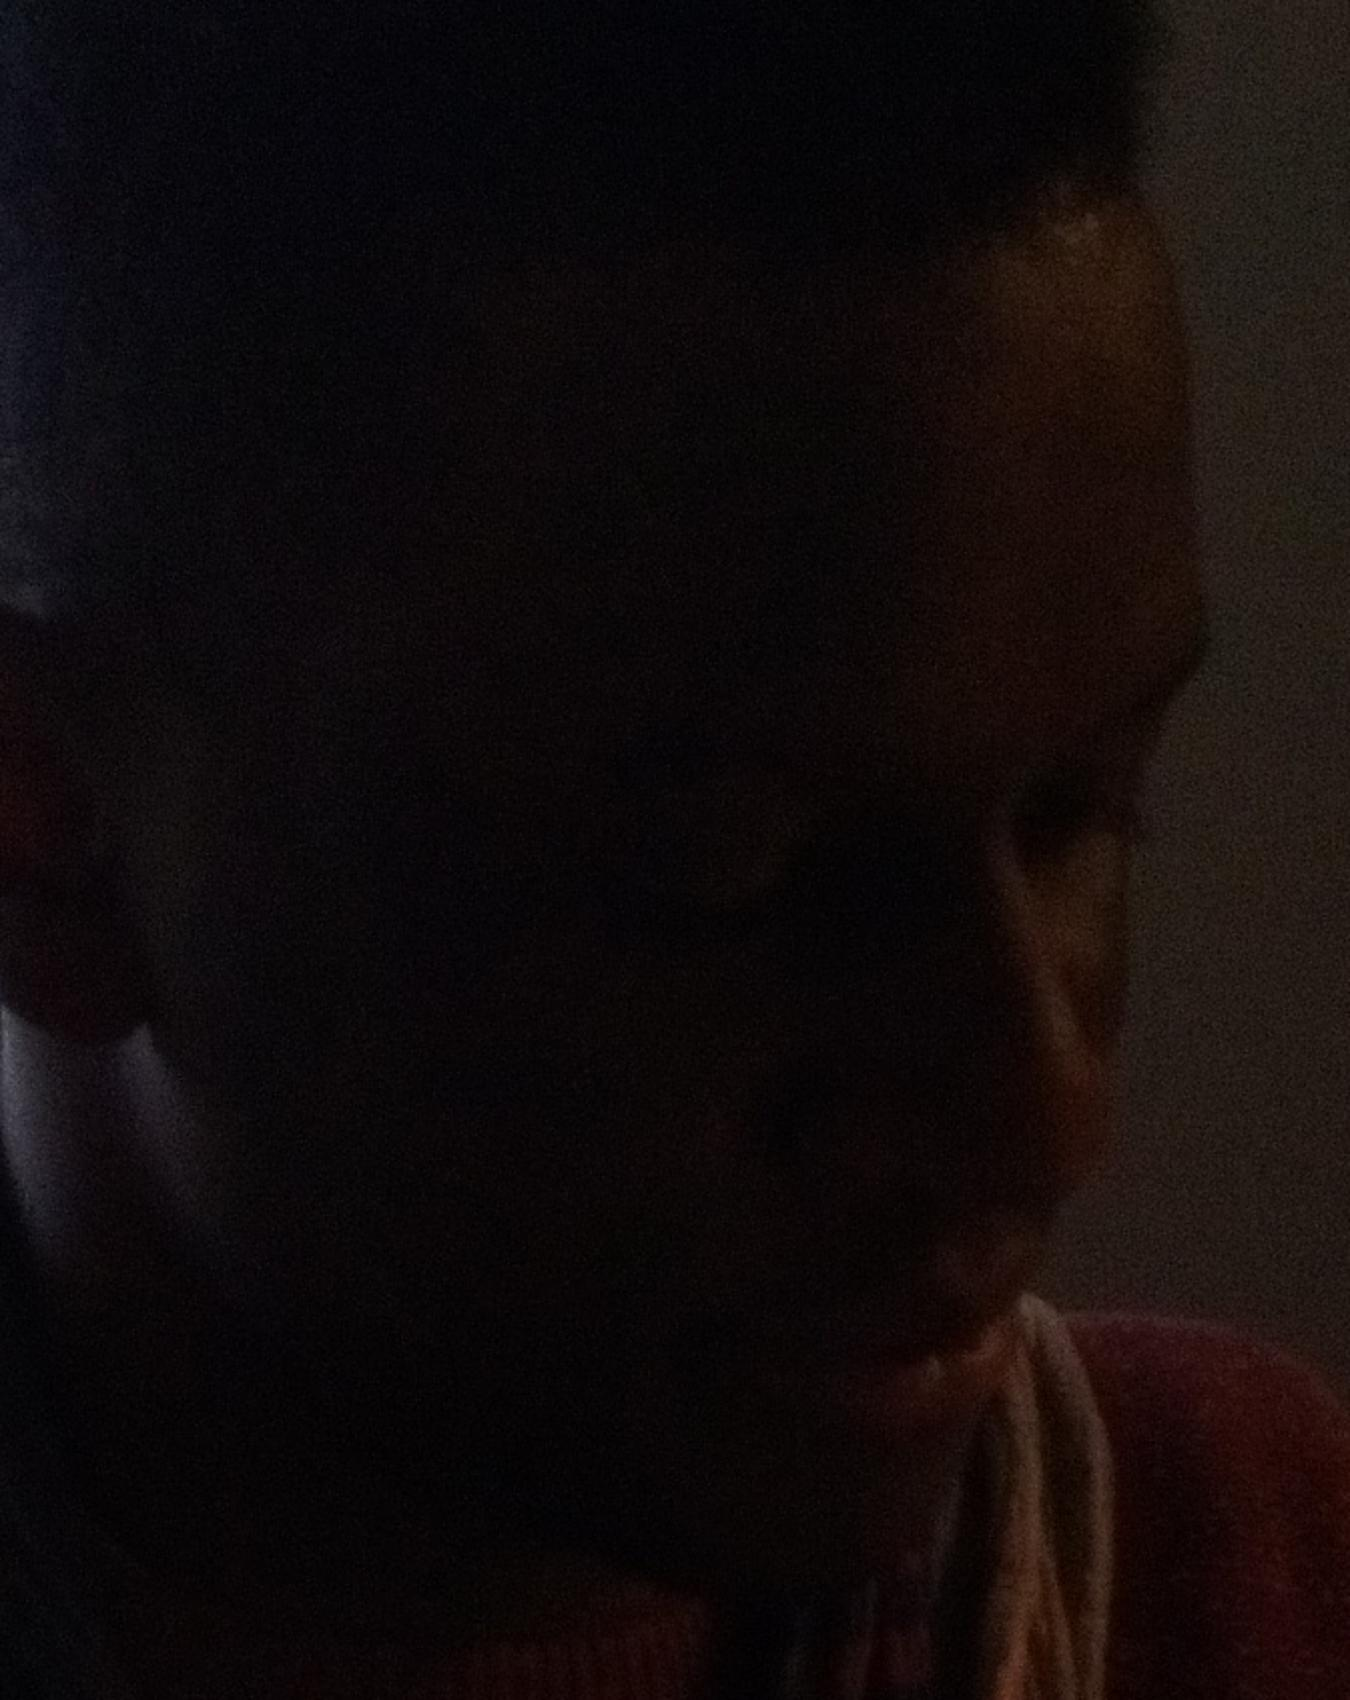

In [5]:
from IPython.display import Image
Image(exposure_filenames[2])

Using the pretrained model - https://huggingface.co/google/vit-base-patch16-224

In [6]:
model_url = 'google/vit-base-patch16-224'

In [27]:
help(PIL.Image.open)

Help on function open in module PIL.Image:

open(fp, mode='r', formats=None)
    Opens and identifies the given image file.
    
    This is a lazy operation; this function identifies the file, but
    the file remains open and the actual image data is not read from
    the file until you try to process the data (or call the
    :py:meth:`~PIL.Image.Image.load` method).  See
    :py:func:`~PIL.Image.new`. See :ref:`file-handling`.
    
    :param fp: A filename (string), pathlib.Path object or a file object.
       The file object must implement ``file.read``,
       ``file.seek``, and ``file.tell`` methods,
       and be opened in binary mode.
    :param mode: The mode.  If given, this argument must be "r".
    :param formats: A list or tuple of formats to attempt to load the file in.
       This can be used to restrict the set of formats checked.
       Pass ``None`` to try all supported formats. You can print the set of
       available formats by running ``python3 -m PIL`` or using

In [7]:
import numpy as np

In [8]:
#converting filenames to PIL Image objects
details_images = [PIL.Image.open(f) for f in details_filenames if os.path.splitext(f)[1] in [".JPG", ".jpeg", ".jpg", ".tif", ".tiff"]]
exposure_images = [PIL.Image.open(f) for f in exposure_filenames if os.path.splitext(f)[1] in [".JPG", ".jpeg", ".jpg", ".tif", ".tiff"]]
overall_images = [PIL.Image.open(f) for f in overall_filenames if os.path.splitext(f)[1] in [".JPG", ".jpeg", ".jpg", ".tif", ".tiff"]]

In [11]:
details_images[5].size

(1900, 2400)

In [1]:
details_images = list(map(lambda x: x.resize(size=(224, 224)), details_images))
exposure_images = list(map(lambda x: x.resize(size=(224, 224)), exposure_images))
overall_images = list(map(lambda x: x.resize(size=(224, 224)), overall_images))

NameError: name 'details_images' is not defined